In [1]:
# Rules for Dates
# 1) Coerce everything into a Timestamp.
# 2) .normalize all the things.

import datetime
date_1 = datetime.datetime.now()
print(date_1)
print(date_1.__repr__())
print(type(date_1))


2020-09-22 14:43:30.402978
datetime.datetime(2020, 9, 22, 14, 43, 30, 402978)
<class 'datetime.datetime'>


In [3]:
date_2 = datetime.date.today()
print(date_2)
print(date_2.__repr__())
print(type(date_2))

2020-09-22
datetime.date(2020, 9, 22)
<class 'datetime.date'>


In [5]:
# You can also fill in date objects manually
# (year, month, day, hour, minute, secon, millisecond)
print(datetime.datetime(1993, 6, 7, 15, 16, 0))
print(datetime.datetime(1993, 6, 7, 15, 16))

1993-06-07 15:16:00
1993-06-07 15:16:00


In [7]:
# Timestamps
# behaves like a datetime.datetime object but plays nicer 
# with DataFrames and DatetimeIndexes

import pandas as pd

print(pd.Timestamp(date_1))
print(pd.to_datetime(date_1))

2020-09-22 14:43:30.402978
2020-09-22 14:43:30.402978


In [8]:
# Manually create a timestamp
date_3 = pd.Timestamp(1993, 6, 7, 15, 16, 0)
date_3

Timestamp('1993-06-07 15:16:00')

In [9]:
# .NORMALIZE
# stripping all of the time information and just leaving 
# data bits attached.

print(date_1)
date_1 = pd.Timestamp(date_1)
print(date_1)
print(date_1.normalize())


2020-09-22 14:43:30.402978
2020-09-22 14:43:30.402978
2020-09-22 00:00:00


In [16]:
# Time Horizon
# Constrain everything to a year.datetime
# Create Global start and end date variables
TODAY = pd.Timestamp(2020,9,22,).normalize()
print(TODAY)
END = TODAY + datetime.timedelta(days=365)
print(END)

2020-09-22 00:00:00
2021-09-22 00:00:00


In [37]:
# Create an empty Calendar
# calendar = pd.DataFrame(index=pd.date_range(start=TODAY, end=END))
calendar = pd.DataFrame(
    data={'date':""},
    index=pd.date_range(start=TODAY, end=END)
)
print(calendar.head())

date
2020-09-22     
2020-09-23     
2020-09-24     
2020-09-25     
2020-09-26     


In [20]:
# Two useful offset aliases (SM & MS)

# SM = semi-month-end-frequency(15th and end of month)
#      - income, and misc. expenses
print('Semi-month End:')
sm = pd.date_range(start=TODAY, end=END, freq="SM")
print(sm)
print('\n')

# MS = month start frequency
#      - Utilities, Rent, Bills
print('Month Start:')
ms = pd.date_range(start=TODAY, end=END, freq="MS")
print(ms)

Semi-month End:
DatetimeIndex(['2020-09-30', '2020-10-15', '2020-10-31', '2020-11-15',
               '2020-11-30', '2020-12-15', '2020-12-31', '2021-01-15',
               '2021-01-31', '2021-02-15', '2021-02-28', '2021-03-15',
               '2021-03-31', '2021-04-15', '2021-04-30', '2021-05-15',
               '2021-05-31', '2021-06-15', '2021-06-30', '2021-07-15',
               '2021-07-31', '2021-08-15', '2021-08-31', '2021-09-15'],
              dtype='datetime64[ns]', freq='SM-15')


Month Start:
DatetimeIndex(['2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq='MS')


In [32]:
#Add Income
income = pd.DataFrame(
    data={'income': 1000},
    index=pd.date_range(start=TODAY, end=END, freq="SM")
)
print(income.head())

income
2020-09-30    1000
2020-10-15    1000
2020-10-31    1000
2020-11-15    1000
2020-11-30    1000


In [22]:
#Add Rent
rent = pd.DataFrame(
    data={'rent':-1500},
    index=pd.date_range(start=TODAY, end=END, freq="MS")
)
print(rent.head())

rent
2020-10-01 -1500
2020-11-01 -1500
2020-12-01 -1500
2021-01-01 -1500
2021-02-01 -1500


In [38]:
# Now we have two "cash flow" objects (income and rent)
# Concatinate them together
calendar = pd.concat([calendar, income], axis=1).fillna(0)
calendar = pd.concat([calendar, rent], axis=1).fillna(0)
print(calendar.head(5))


date  income  rent
2020-09-22          0.0   0.0
2020-09-23          0.0   0.0
2020-09-24          0.0   0.0
2020-09-25          0.0   0.0
2020-09-26          0.0   0.0


In [39]:
# Peek into the filled callendar to check.
calendar.loc[
    (calendar.index >= '2020-9-30') &
    (calendar.index <= '2020-10-1')
]

,date,income,rent
2020-09-30,,1000.0,0.0
2020-10-01,,0.0,-1500.0


In [40]:
# Totals
calendar['total'] = calendar.sum(axis=1)
calendar['cum_total'] = calendar['total'].cumsum()

calendar.tail(1)

,date,income,rent,total,cum_total
2021-09-22,,0.0,0.0,0.0,6000.0


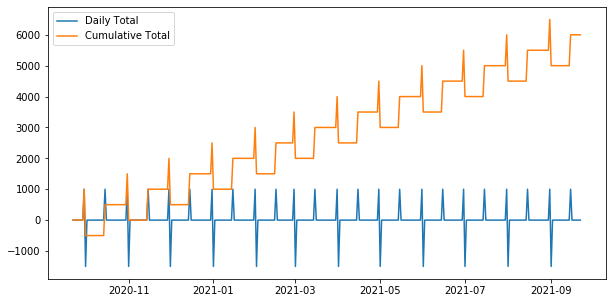

In [42]:
# Visualization
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(calendar.index, calendar.total, label='Daily Total')
plt.plot(calendar.index, calendar.cum_total, label='Cumulative Total')
plt.legend()


In [43]:
# Update.  Initially, you are spending more than you have!!!
# Let's add $2000 grand to the bank.datetime

bank = pd.DataFrame(
    data={'bank': 2000},
    index=pd.date_range(start=TODAY, end=TODAY)
)
print(bank)

bank
2020-09-22  2000


In [44]:
# Add your bank deposit to the calendar
calendar = pd.concat([calendar, bank], axis=1).fillna(0)

calendar.sum(axis=1).head()

2020-09-22    2000.0
2020-09-23       0.0
2020-09-24       0.0
2020-09-25       0.0
2020-09-26       0.0
Freq: D, dtype: float64

In [45]:
def update_totals(df):
    # check to see if those columns ixit in our dataframe
    if df.columns.isin(['total','cum_total']).any():
        # if they do exist set them to o
        df['total'] = 0
        df['cum_total'] = 0
    # Recalculate total and cumulative_total
    df['total'] = df.sum(axis=1)
    df['cum_total'] = df['total'].cumsum()
    return df

calendar = update_totals(calendar)
calendar.tail(1)

,date,income,rent,total,cum_total,bank
2021-09-22,,0.0,0.0,0.0,8000.0,0.0


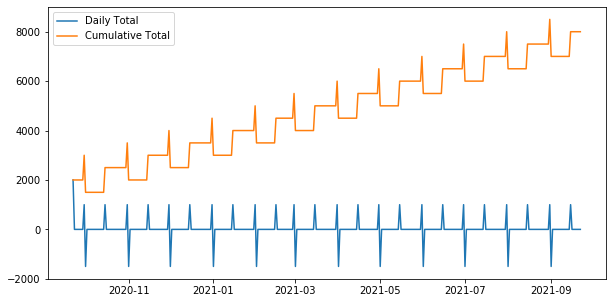

In [46]:
def plot_budget(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df.total, label='Daily Total')
    plt.plot(df.index, df.cum_total, label='Cumulative Total')
    plt.legend()

plot_budget(calendar)

In [52]:
# We are now cash Flow Positive!!!!
# Let's Plane our first vacation 2 months from now to Columbia

vacation = pd.DataFrame(
    data={'vacation': -2500},
    index=[pd.Timestamp(2020, 11, 22).normalize()]
)
print(vacation)

vacation
2020-11-22     -2500


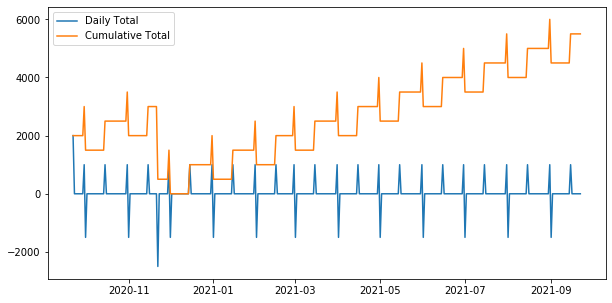

In [53]:
# Add vacation to calendar!
calendar = pd.concat([calendar, vacation], axis=1).fillna(0)
calendar = update_totals(calendar)
plot_budget(calendar)


In [ ]:
# You are trying to spend more than you have.  
# Let's drop the calendar and work on other things
calendar = calendar.drop('vacation', axis=1)

In [61]:
# Dealing with Irregular Cash Flows
from recurrent import RecurringEvent

# Use recurrent to define custom frequencies
# Recurrent is an english parsing library
frequency = 'every week until February 10th'
r = RecurringEvent()
r.parse(frequency)

'RRULE:INTERVAL=1;FREQ=WEEKLY;UNTIL=20210210'

In [62]:
# To handle rrules, we need one more import
from dateutil import rrule

rr = rrule.rrulestr(r.get_RFC_rrule())
rr.between(TODAY, END)

[datetime.datetime(2020, 9, 22, 16, 19, 21),
 datetime.datetime(2020, 9, 29, 16, 19, 21),
 datetime.datetime(2020, 10, 6, 16, 19, 21),
 datetime.datetime(2020, 10, 13, 16, 19, 21),
 datetime.datetime(2020, 10, 20, 16, 19, 21),
 datetime.datetime(2020, 10, 27, 16, 19, 21),
 datetime.datetime(2020, 11, 3, 16, 19, 21),
 datetime.datetime(2020, 11, 10, 16, 19, 21),
 datetime.datetime(2020, 11, 17, 16, 19, 21),
 datetime.datetime(2020, 11, 24, 16, 19, 21),
 datetime.datetime(2020, 12, 1, 16, 19, 21),
 datetime.datetime(2020, 12, 8, 16, 19, 21),
 datetime.datetime(2020, 12, 15, 16, 19, 21),
 datetime.datetime(2020, 12, 22, 16, 19, 21),
 datetime.datetime(2020, 12, 29, 16, 19, 21),
 datetime.datetime(2021, 1, 5, 16, 19, 21),
 datetime.datetime(2021, 1, 12, 16, 19, 21),
 datetime.datetime(2021, 1, 19, 16, 19, 21),
 datetime.datetime(2021, 1, 26, 16, 19, 21),
 datetime.datetime(2021, 2, 2, 16, 19, 21),
 datetime.datetime(2021, 2, 9, 16, 19, 21)]

In [63]:
# use list comprehension to make dates of type Timestame and normalize
[pd.to_datetime(date).normalize() for date in rr.between(TODAY, END)]

[Timestamp('2020-09-22 00:00:00'),
 Timestamp('2020-09-29 00:00:00'),
 Timestamp('2020-10-06 00:00:00'),
 Timestamp('2020-10-13 00:00:00'),
 Timestamp('2020-10-20 00:00:00'),
 Timestamp('2020-10-27 00:00:00'),
 Timestamp('2020-11-03 00:00:00'),
 Timestamp('2020-11-10 00:00:00'),
 Timestamp('2020-11-17 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2020-12-08 00:00:00'),
 Timestamp('2020-12-15 00:00:00'),
 Timestamp('2020-12-22 00:00:00'),
 Timestamp('2020-12-29 00:00:00'),
 Timestamp('2021-01-05 00:00:00'),
 Timestamp('2021-01-12 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-02-02 00:00:00'),
 Timestamp('2021-02-09 00:00:00')]

In [69]:
# Function that will create irregular cash flow frequency aliases
def get_dates(frequency):
    # let pandas try and handle single dates
    try:
        return [pd.Timestamp(frequency).normalize()]
    except ValueError:
        pass
    # parse frequency with recurrent
    try:
        r = RecurringEvent()
        r.parse(frequency)
        rr = rrule.rrulestr(r.get_RFC_rrule())
        return [
            pd.to_datetime(date).normalize()
            for date in rr.between(TODAY, END)
        ]
    except ValueError as e:
        raise ValueError('Invalid Frequency')

In [71]:
get_dates('2021-01-01')

[Timestamp('2021-01-01 00:00:00')]

In [72]:
get_dates('every week until July 10th')

[Timestamp('2020-09-22 00:00:00'),
 Timestamp('2020-09-29 00:00:00'),
 Timestamp('2020-10-06 00:00:00'),
 Timestamp('2020-10-13 00:00:00'),
 Timestamp('2020-10-20 00:00:00'),
 Timestamp('2020-10-27 00:00:00'),
 Timestamp('2020-11-03 00:00:00'),
 Timestamp('2020-11-10 00:00:00'),
 Timestamp('2020-11-17 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2020-12-08 00:00:00'),
 Timestamp('2020-12-15 00:00:00'),
 Timestamp('2020-12-22 00:00:00'),
 Timestamp('2020-12-29 00:00:00'),
 Timestamp('2021-01-05 00:00:00'),
 Timestamp('2021-01-12 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-02-02 00:00:00'),
 Timestamp('2021-02-09 00:00:00'),
 Timestamp('2021-02-16 00:00:00'),
 Timestamp('2021-02-23 00:00:00'),
 Timestamp('2021-03-02 00:00:00'),
 Timestamp('2021-03-09 00:00:00'),
 Timestamp('2021-03-16 00:00:00'),
 Timestamp('2021-03-23 00:00:00'),
 Timestamp('2021-03-30 00:00:00'),
 Timestamp('2021-04-

In [73]:
get_dates('this will not work')


TypeError: expected string or bytes-like object

In [74]:
# Fun Money
# Let's add a $40 expense every friday and Saturday for a night out

dates = get_dates('every week on Friday and Saturday')
dates[:10] # first ten instances of the new rule


[Timestamp('2020-09-25 00:00:00'),
 Timestamp('2020-09-26 00:00:00'),
 Timestamp('2020-10-02 00:00:00'),
 Timestamp('2020-10-03 00:00:00'),
 Timestamp('2020-10-09 00:00:00'),
 Timestamp('2020-10-10 00:00:00'),
 Timestamp('2020-10-16 00:00:00'),
 Timestamp('2020-10-17 00:00:00'),
 Timestamp('2020-10-23 00:00:00'),
 Timestamp('2020-10-24 00:00:00')]

In [76]:
# wrap these dates into a dataFrame object
pd.DatetimeIndex(pd.Series(dates))

DatetimeIndex(['2020-09-25', '2020-09-26', '2020-10-02', '2020-10-03',
               '2020-10-09', '2020-10-10', '2020-10-16', '2020-10-17',
               '2020-10-23', '2020-10-24',
               ...
               '2021-08-20', '2021-08-21', '2021-08-27', '2021-08-28',
               '2021-09-03', '2021-09-04', '2021-09-10', '2021-09-11',
               '2021-09-17', '2021-09-18'],
              dtype='datetime64[ns]', length=104, freq=None)

In [87]:
# wrap the index in a list
dates = get_dates('every week on Friday and Saturday')
fun = pd.DataFrame(
    data={'fun': -40},
    index=pd.DatetimeIndex(pd.Series(dates))
)

In [88]:
print(fun.head())

fun
2020-09-25  -40
2020-09-26  -40
2020-10-02  -40
2020-10-03  -40
2020-10-09  -40


In [95]:
# add fun to calendar
calendar = pd.concat([calendar, fun], axis=1).fillna(0)

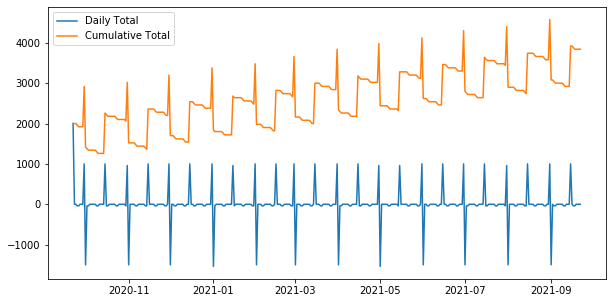

In [96]:
calendar = update_totals(calendar)
plot_budget(calendar)

In [115]:
# Now let's use YAML to add all of our budget items.datetime
import yaml

# open the yaml file and convert to a dictionary
with open('../data/budget.yaml') as file:
    budget = yaml.load(file)
print(budget)

{'bank': {'frequency': 'today', 'amount': 2000}, 'income': {'frequency': 'every 2 weeks on Friday', 'amount': 1000}, 'rent': {'frequency': 'every month', 'amount': -1500}, 'fun': {'frequency': 'every week on Friday and Saturday', 'amount': -40}, 'vacation': {'frequency': datetime.date(2021, 7, 1), 'amount': -1000}, 'savings': {'frequency': 'every Monday starting in August', 'amount': -50}}


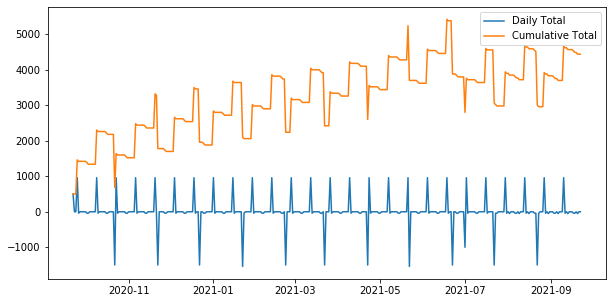

In [116]:
# Create a calendar 
calendar = pd.DataFrame(index=pd.date_range(start=TODAY, end=END))

for k, v in budget.items():
    frequency = v.get('frequency')
    amount = v.get('amount')
    dates = get_dates(frequency)
    i = pd.DataFrame(
        data={k: amount},
        index=pd.DatetimeIndex(pd.Series(dates))
    )
    calendar = pd.concat([calendar, i], axis=1).fillna(0)

calendar['total'] = calendar.sum(axis=1)
calendar['cum_total'] = calendar['total'].cumsum()

plot_budget(calendar)

In [121]:
# Calendar Creation Function
def build_calendar(budget):
    calendar = pd.DataFrame(index=pd.date_range(start=TODAY, end=END))
    
    for k, v in budget.items():
        frequency = v.get('frequency')
        amount = v.get('amount')
        dates = get_dates(frequency)
        i = pd.DataFrame(
            data={k: amount},
            index=pd.DatetimeIndex(pd.Series(dates))
        )
        calendar = pd.concat([calendar, i], axis=1).fillna(0)
    
    calendar['total'] = calendar.sum(axis=1)
    calendar['cum_total'] = calendar['total'].cumsum()
    return calendar 

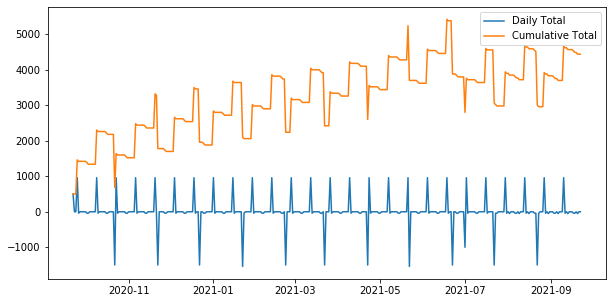

In [122]:
# Test the Function
with open('../data/budget.yaml') as file:
    budget = yaml.load(file)

calendar = build_calendar(budget)
plot_budget(calendar)
